<font size="+3"><strong>Databases: SQL</strong></font>

In [1]:
from IPython.display import YouTubeVideo

# Working with SQL Databases

A database is a collection of interrelated data. The primary goal of a database is to store and retrieve information in a convenient and efficient way. There are many types of databases. In this section, we will be dealing with a **relational database**. A relational database is a widely used database model that consists of a collection of uniquely named **tables** used to store information. The structure of a database model with its tables, constraints, and relationships is called a **schema**. 

A Structured Query Language (**SQL**), is used to retrieve information from a relational database. SQL is one of the most commonly used database languages. It allows data stored in a relational database to be queried, modified, and manipulated easily with basic commands. SQL powers database engines like MySQL, SQL Server, SQLite, and PostgreSQL. The examples and projects in this course will use SQLite. 

A **table** refers to a collection of rows and columns in a relational database. When reading data into a pandas DataFrame, an **index** can be defined, which acts as the label for every row in the DataFrame.

# Connecting to a Database

## ipython-sql 

### Magic Commands

Jupyter notebooks can run code that is not valid Python code but still affect the notebook . These special commands are called magic commands. Magic commands can have a range of properties. Some commonly used magic functions are below:

| Magic Command | Description of Command | 
| --- | --- | 
| `%pwd` | Print the current working directory |
| `%cd` | Change the current working directory |
| `%ls` | List the contents of the current directory |
| `%history` | Show the history of the In [ ]: commands |

We will be leveraging magic commands to work with a SQLite database. 

### ipython-sql

`ipython-sql` allows you to write SQL code directly in a Jupyter Notebook. The `%sql` (or `%%sql`) magic command is added to the beginning of a code block and then SQL code can be written.

### Connecting with ipython-sql

We can connect to a database using the %sql magic function:

In [2]:
%load_ext sql
%sql sqlite:////home/jovyan/nepal.sqlite

'Connected: @/home/jovyan/nepal.sqlite'

## sqlite3

We can also connect to the same database using the sqlite3 package:

In [3]:
import sqlite3 as sql

conn = sql.connect("/home/jovyan/nepal.sqlite")

# Querying a Database

## Building Blocks of the Basic Query

There are six common clauses used for querying data:
   
| Clause Name | Definition | 
| --- | --- | 
| `SELECT` | Determines which columns to include in the query's result |
| `FROM` | Identifies the table from which to query the data from |
| `WHERE` | filters data |
| `GROUP BY` | groups rows by common values in columns |
| `HAVING` | filters out unwanted groups from GROUP BY |
| `ORDER BY` | Orders the rows using one or more columns |
| `LIMIT` | Outputs the specified number of rows |

All clauses may be used together, but `SELECT` and `FROM` are the only required clauses. The format of clauses is in the example query below:

```sql
SELECT column1, column2
FROM table_name
WHERE "conditions"
GROUP BY "column-list"
HAVING "conditions"
ORDER BY "column-list"
```

## SELECT and FROM

You can use `SELECT *` to select all columns in a table. `FROM` specifies the table in the database to query. `LIMIT 5` will select only the first five rows. 

*Example*

In [4]:
%%sql
SELECT *
FROM id_map
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
5601,56,7,1
6301,63,7,1
9701,97,7,1
9901,99,7,1
11501,115,7,1


You can also use `SELECT` to select certain columns in a table

In [5]:
%%sql
SELECT household_id,
       building_id
FROM id_map
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id
5601,56
6301,63
9701,97
9901,99
11501,115


<font size="+1">Practice</font>

Try it yourself! Use `SELECT` to select the `district_id` column from the `id_map` table.

In [6]:
%%sql
SELECT district_id    
FROM id_map
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


district_id
1
1
1
1
1


We can also assign an **alias** or temporary name to a column using the `AS` command. Aliases can also be used on a table. See the example below, which assigns the alias `household_number` to `household_id`

In [7]:
%%sql
SELECT household_id AS household_number,
       building_id
FROM id_map
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_number,building_id
5601,56
6301,63
9701,97
9901,99
11501,115


<font size="+1">Practice</font>

Try it yourself! Use `SELECT`, `FROM`, `AS`, and `LIMIT` to select the first 5 rows from the `id_map` table. Rename the  `district_id` column to `district_number`. 

In [8]:
%%sql
SELECT district_id AS district_number
FROM id_map
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


district_number
1
1
1
1
1


## Filtering and Sorting Data

SQL provides a variety of comparison operators that can be used with the WHERE clause to filter the data. 


| Comparison Operator | Description | 
| --- | --- | 
| = | Equal |
| > | Greater than |
| < | Less than|
| >= | Greater than or equal to |
| <= | Less than or equal to |
| <> or != | Not equal to |
| LIKE | String comparison test |

For example, to select the first 5 homes in Ramechhap (district `2`):

In [11]:
%%sql
SELECT *
FROM id_map
WHERE district_id = 2
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
3530801,35308,16,2
3533801,35338,16,2
3535201,35352,16,2
3535401,35354,16,2
3536501,35365,16,2


<font size="+1">Practice</font>

Try it yourself! Use `WHERE` to select the row with `household_id` equal to 13735001

In [12]:
%%sql
SELECT *
FROM id_map
WHERE household_id = 13735001
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
13735001,137350,17,3


## Aggregating Data

Aggregation functions take a collection of values as inputs and return one value as the output. The table below gives the frequently used built-in aggregation functions:

| Aggregation Function | Definition                        |
| -------------------- | --------------------------------- |
| `MIN`                  | Return the minimum value          |
| `MAX`                  | Return the largest value          |
| `SUM`                  | Return the sum of values          |
| `AVG`                  | Return the average of values      |
| `COUNT`                | Return the number of observations |

Use the `COUNT` function to find the number of observations in the `id_map` table that come from Ramechhap (district `2`):

In [14]:
%%sql
SELECT count(*) AS no_of_observations
FROM id_map
WHERE district_id = 2

 * sqlite:////home/jovyan/nepal.sqlite
Done.


no_of_observations
55253


Aggregation functions are frequently used with a `GROUP BY` clause to perform the aggregation on groups of data. For example, the query below returns the count of observations in each District:

In [16]:
%%sql
SELECT district_id,
       count(*) AS no_of_observations
FROM id_map
GROUP BY district_id
ORDER BY no_of_observations DESC

 * sqlite:////home/jovyan/nepal.sqlite
Done.


district_id,no_of_observations
3,82684
4,75883
2,55253
1,36112


 `DISTINCT` is a keyword to select unique records in a query result. For example, if we want to know the unique values in the `district_id` column:

In [17]:
%%sql
SELECT distinct(district_id)
FROM id_map

 * sqlite:////home/jovyan/nepal.sqlite
Done.


district_id
1
2
3
4


<font size="+1">Practice</font>

Try it yourself! Use `DISTINCT` to count the number of unique values in the `vdcmun_id` column. 

In [24]:
%%sql
SELECT distinct(vdcmun_id)
FROM id_map
ORDER BY vdcmun_id ASC

 * sqlite:////home/jovyan/nepal.sqlite
Done.


vdcmun_id
1
2
3
4
5
6
7
8
9
10


`DISTINCT` and `COUNT` can be used in combination to count the number of distinct records. For example, if we want to know the number of unique values in the `district_id` column:

In [25]:
%%sql
SELECT count(distinct(district_id))
FROM id_map

 * sqlite:////home/jovyan/nepal.sqlite
Done.


count(distinct(district_id))
4


<font size="+1">Practice</font>

Try it yourself! Use `DISTINCT` and `COUNT` to count the number of unique values in the `vdcmun_id` column. 

In [26]:
%%sql
SELECT count(distinct(vdcmun_id))
FROM id_map

 * sqlite:////home/jovyan/nepal.sqlite
Done.


count(distinct(vdcmun_id))
40


# Joining Tables

Joins link data from two or more tables together by using a column that is common between the two tables. The basic syntax for a join is below, where `table1` and `table2` refer to the two tables being joined, `column1` and `column2` refer to columns to be returned from both tables, and `ID` refers to the common column in the two tables. 

```sql
SELECT table1.column1,
       table2.column2
FROM table_1
JOIN table2 ON table1.id = table1.id
```


We'll explore the concept of joins by first identifying a single household that we'd like to pull in building information for. For example, let's say we want to see the corresponding `foundation_type` for the first home in Ramechhap (District 1). We'll start by looking at this single record in the `id_map` table.

In [30]:
%%sql
SELECT *
FROM id_map
WHERE building_id = 23
LIMIT 1

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
2301,23,7,1


This household has `building_id` equal to 23. Let's look at the `foundation_type` for this building, by filtering the `building_structure` table to find this building.

In [31]:
%%sql
SELECT building_id,
       foundation_type
FROM building_structure
WHERE building_id = 23

 * sqlite:////home/jovyan/nepal.sqlite
Done.


building_id,foundation_type
23,Mud mortar-Stone/Brick


To join the two tables and limit the results to `building_id = 23`:    

In [33]:
%%sql
SELECT mp.*,
       bs.foundation_type
FROM id_map AS mp
JOIN building_structure AS bs ON mp.building_id = bs.building_id
WHERE mp.building_id = 23

 * sqlite:////home/jovyan/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id,foundation_type
2301,23,7,1,Mud mortar-Stone/Brick


In addition to the basic `JOIN` clause, specific join types can be specified, which specify whether the common column needs to be in one, both, or either of the two tables being joined. The different join types are below. The left table is the table specified first, immediately after the `FROM` clause and the right table is the table specified after the `JOIN` clause. If the generic `JOIN` clause is used, then by default the `INNER JOIN` will be used.

| JOIN Type | Definition                        |
| -------------------- | --------------------------------- |
| `INNER JOIN`                  | Returns rows where ID is in both tables         |
| `LEFT JOIN`                  | Returns rows where ID is in the left table. Return NA for values in column, if ID is not in right table.          |
| `RIGHT JOIN`                  | Returns rows where ID is in the right table. Return NA for values in column, if ID is not in left table. 
| `FULL JOIN`                  | Returns rows where ID is in either table. Return NA for values in column, if ID is not in either table.           |   |


The video below outlines the main types of joins:

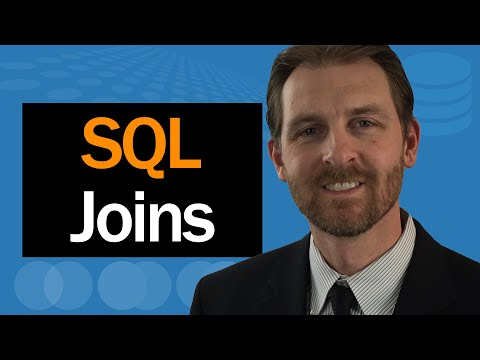

In [34]:
YouTubeVideo("2HVMiPPuPIM")

<font size="+1">Practice</font>

Try it yourself! Use the `DISTINCT` command to create a column with all unique building IDs in the `id_map` table. `LEFT JOIN` this column with the `roof_type` column from the `building_structure` table, showing only buildings where **`district_id`** is `1` and limiting your results to the first five rows of the new table.

In [43]:
%%sql
SELECT distinct(id_map.building_id),
       id_map.district_id,
       building_structure.roof_type
FROM id_map
LEFT JOIN building_structure ON id_map.building_id = building_structure.building_id
WHERE district_id = 1
LIMIT 5

 * sqlite:////home/jovyan/nepal.sqlite
Done.


building_id,district_id,roof_type
56,1,Bamboo/Timber-Light roof
63,1,Bamboo/Timber-Light roof
97,1,Bamboo/Timber-Light roof
99,1,Bamboo/Timber-Light roof
115,1,Bamboo/Timber-Light roof


# Using pandas with SQL Databases

To save the output of a query into a pandas DataFrame, we will use connect to the SQLite database using the SQLite3 package:

In [44]:
import sqlite3 as sql

conn = sql.connect("/home/jovyan/nepal.sqlite")

To run a query using `sqlite3`, we need to store the query as a string. For example, the variable below called `query` is a string containing a query which returns the first 10 rows from the `id_map` table:

In [45]:
query = """
    SELECT *
    FROM id_map
    LIMIT 10
    """

To save the results of the query into a pandas DataFrame, use the `pd.read_sql()` function. The optional parameter `index_col` can be used to set the index to a specific column from the query. 

In [46]:
import pandas as pd

df = pd.read_sql(query, conn, index_col="building_id")

df.head()

,household_id,vdcmun_id,district_id
building_id,,,
56,5601,7,1
63,6301,7,1
97,9701,7,1
99,9901,7,1
115,11501,7,1


<font size="+1">Practice</font>

Try it yourself! Use the `pd.read_sql` function to save the results of a query to a DataFrame. The query should select first 20 rows from the `id_map` table. 

In [47]:
query = """
        SELECT *
        FROM id_map
        LIMIT 20
"""

df2 = pd.read_sql_query(query, conn, index_col="building_id")

df2.head()

,household_id,vdcmun_id,district_id
building_id,,,
56,5601,7,1
63,6301,7,1
97,9701,7,1
99,9901,7,1
115,11501,7,1


# References & Further Reading

- [Additional Explanation of Magic Commands](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.06-Magic-Commands/)
- [ipython-SQL User Documentation](https://anaconda.org/conda-forge/ipython-sql)
- [Data Carpentry Course on SQL in Python](https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html)
- [SQL Course Material on GitHub (1)](https://github.com/exlskills/course-sql-introduction)
- [SQL Course Material on GitHub (2)](https://github.com/MicrosoftLearning/QueryingT-SQL)